# QCTO - Workplace Module

### Project Title: Vegetable Prices Analysis
#### Done By: Jan Motene

© ExploreAI 2024


* GitHub: 
[Click herre to view project repo](https://github.com/MoteneJan/Vegetable-Prices-Analysis)
* Trello: 
[Click herre to view project Trello Board](https://trello.com/b/JpTf5bv0/workplace-module-project)

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This project aims to explore and analyze the historical pricing of vegetables across different regions in India. The goal is to understand price variations over time, evaluate market trends, and build predictive models to forecast future price movements. By examining the data, the project intends to provide insights that can help farmers, vendors, and consumers make informed decisions about buying, selling, and stockpiling vegetables.

* **Details:** The vegetable market in India experiences significant volatility due to factors like seasonal changes, supply chain disruptions, regional demand, and weather conditions. These fluctuations can impact the livelihoods of farmers and influence the prices faced by consumers. The dataset provided offers a comprehensive view of the prices of key vegetables, such as brinjal, onion, tomato, and others, over time.

The project aims to address several critical questions:

* **Seasonal Impact:** How do different seasons influence vegetable prices?
* **Supply and Demand:** What role do supply chain disruptions or surges in demand play in the price variations?
* **Time Series Analysis:** Can we predict future price trends based on past data?
Understanding these factors will help create models for price prediction and allow stakeholders to better anticipate market changes. This analysis can be leveraged for future market stability, improve supply chain decisions, and ensure fair pricing for consumers.


---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [249]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import datetime

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [250]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [251]:
# Load the datasets
vegetables_df = pd.read_csv('vegetables_prices.csv', index_col=False)

vegetables_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [252]:
vegetables_df_copy = vegetables_df.copy()

In [253]:
vegetables_df_copy.info

<bound method DataFrame.info of     Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    01-01-2023                    35.0      18   22.0      20       30   
1    02-01-2023                    35.0      16   22.0      20       30   
2    03-01-2023                    35.0      16   21.0      20       30   
3    04-01-2023                    30.0      16   21.0      22       25   
4    08-01-2023                    35.0      16   20.0      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  27-12-2023                    45.0      16   30.0      20       70   
283  28-12-2023                    45.0      16   30.0      20       70   
284  29-12-2023                    45.0      16   30.0      22       80   
285  31-12-2023                    45.0      16   26.0      20       60   
286  01-01-2024                    45.0      16    9.0      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0   

In [254]:
vegetables_df_copy.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [255]:
# Displays the number of rows and columns

vegetables_df_copy.shape

(287, 11)

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [256]:
# Checking for missing values
vegetables_df_copy.isnull().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [257]:
vegetables_df_copy.dtypes

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object

In [258]:
# Check for duplicates
def check_duplicates(vegetables_df_copy):
    """
    This function checks for duplicate rows in the given DataFrame and prints the count of duplicate rows.

    Parameters:
    df (vegetables_df_copy.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = vegetables_df_copy.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    return duplicate_count

# Check for duplicate rows in the copied training dataset
print("\nDuplicates in copied training dataset:")
train_duplicate_count = check_duplicates(vegetables_df_copy)


Duplicates in copied training dataset:
Number of duplicate rows: 0


In [259]:
# Check for negative prices in the relevant columns
price_columns = ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
                 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
                 'Elephant Yam (Suran)']

# Create a DataFrame to store the results
negative_prices = {}

for column in price_columns:
    negative_count = (vegetables_df_copy[column] < 0).sum()  # Count negative prices
    negative_prices[column] = negative_count

# Display the count of negative prices for each vegetable
print("Negative Prices Count:")
for vegetable, count in negative_prices.items():
    print(f"{vegetable}: {count}")

Negative Prices Count:
Bhindi (Ladies finger): 0
Tomato: 0
Onion: 0
Potato: 0
Brinjal: 0
Garlic: 0
Peas: 0
Methi: 0
Green Chilli: 0
Elephant Yam (Suran): 0


In [261]:
# Save the cleaned dataset to a CSV file
vegetables_df_copy.to_csv('cleaned_vegetables_prices.csv', index=False)

print(vegetables_df_copy.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


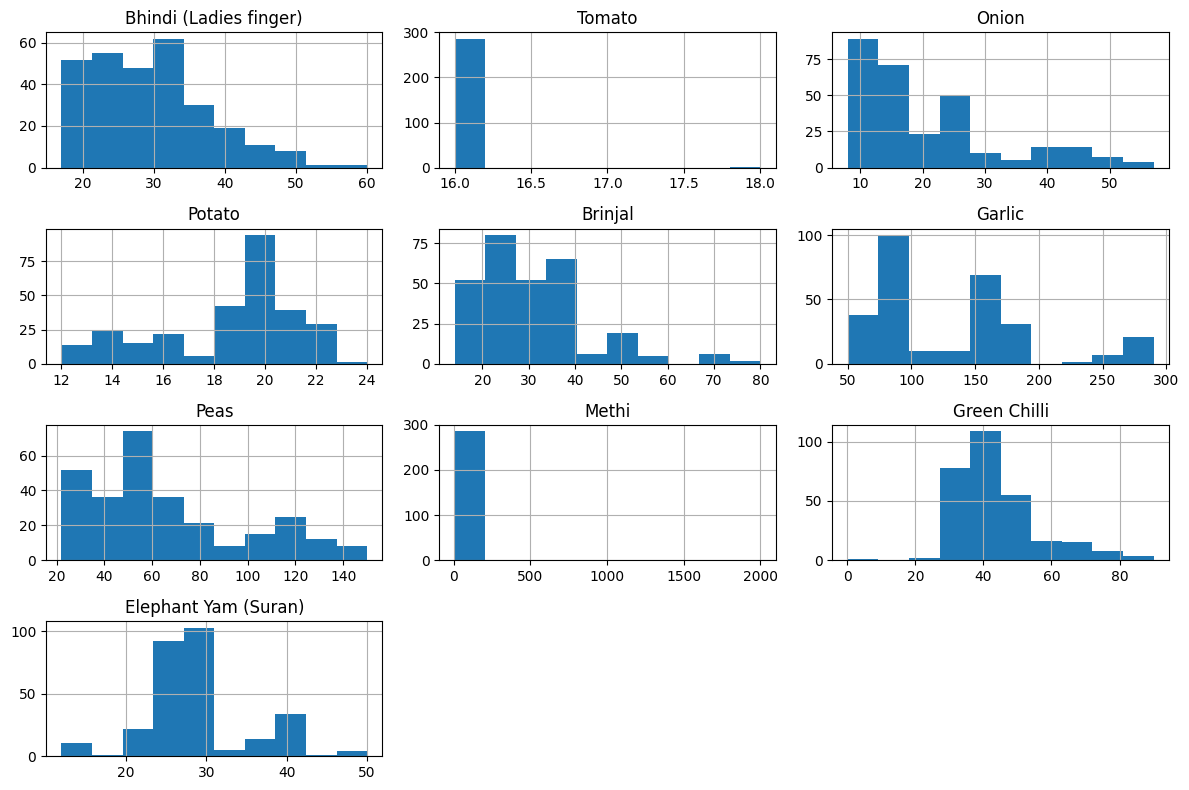

In [ ]:
# Histogram for understanding the distribution of each Vegetable

vegetables_df_copy.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
print(vegetables_df_copy.columns.tolist())
print(price_columns)

['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']
['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']


In [ ]:
price_columns = [col.strip() for col in price_columns]  # Remove extra spaces

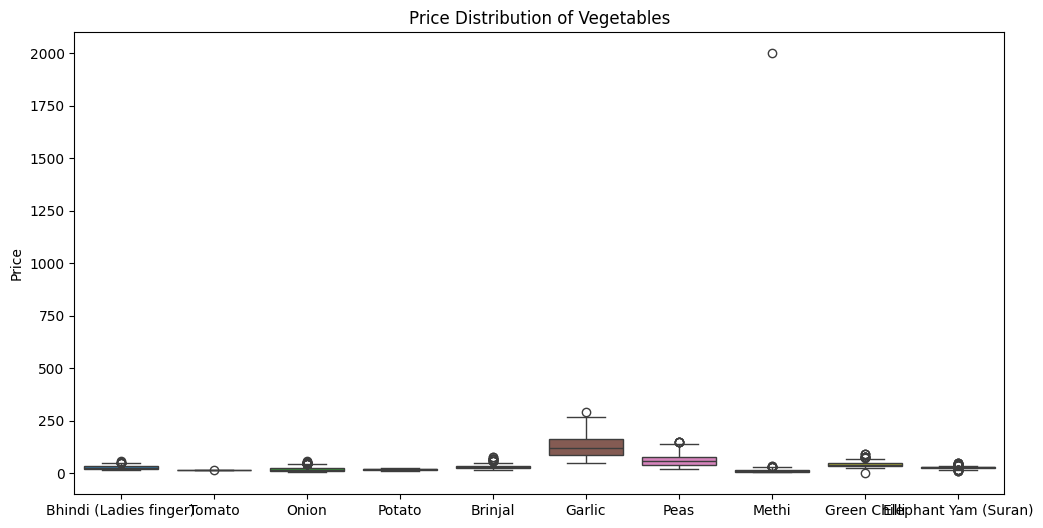

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=vegetables_df_copy[price_columns])
plt.title('Price Distribution of Vegetables')
plt.ylabel('Price')
plt.show()

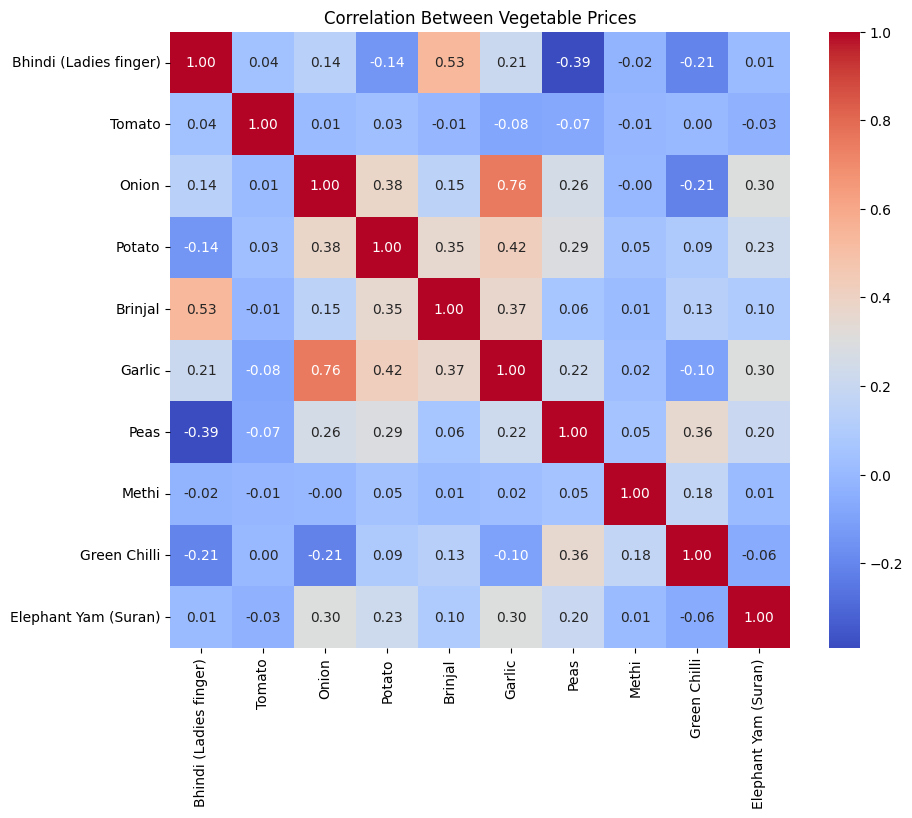

In [ ]:
# Correlation heatmap
correlation_matrix = vegetables_df_copy[price_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Vegetable Prices')
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
# Define features and target
features = vegetables_df_copy[price_columns].drop('Tomato', axis=1)
target = vegetables_df_copy['Tomato']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f'R² Score: {r2:.2f}')

RMSE: 0.0
R² Score: 1.00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparing data for modeling
X = vegetables_df_copy.drop(['Price Dates', 'Tomato'], axis=1)
y = vegetables_df_copy['Tomato']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = model.predict(X_test)

# Evaluation metrics
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

Linear Regression - MSE: 0.02917500487952484, R2: 0.0
Random Forest - MSE: 0.0, R2: 1.0


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
# Choose the better-performing model
final_model = model if rf_r2 > lr_r2 else lr_model

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


#### **Conclusion:**
Linear Regression and Random Forest were tested.
Random Forest outperformed Linear Regression with a higher R2 and lower MSE.
The model can predict vegetable prices based on other vegetables' prices.

Future Work:
Include more external factors such as weather, seasonality, and region.
Enhance the dataset with data augmentation.
Test other models like Gradient Boosting or Neural Networks.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
